# Clustering

```{note}
Disclaimer: This is a stretch goal for the project and therefore, functionalities are not yet available with the package. However, clear documentation of machine learning methods are provided in the link below for future reference. 
```

## Introduction

Electroencephalograms (EEG) is an electrophysiological measurement method used to examine the electrical activity of the brain and represent it as location-based channels of waves and frequencies. 

Essentially, the EEG data from our dataset is recorded from 19 electrodes nodes for 1.5 hours. Therefore, the EEG data is in high dimensionality and could be represented as a multivariate time series data. If we present the data in a tabular format, the number of rows would be the time stamps and the number of columns would be the different electrodes. As we have 1.5 hrs experiment data and each seconds is recorded at 2048 Hz, which means we have 2048 EEG data readings per second, our dataset is large with at least 1 million rows.

## Objectives

EEG data is widely use in diagnosing brain disorders such as epilepsy and brain damage from head injuries, however, with the complexity of data and its dynamic changes over time, it is hard to identify any significant patterns by simply reading the data or visualizing it. The main objective of this strech goal is to find similar patterns from the combination of EEG signals of all 19 electrodes for a given time section from the dataset. In plain English, it is to cluster the brain states for different time periods in the data.

## Challenges

- There is no labeled data or pre-defined brain states. It is hard to verify the output at the current moment.
- Data is in high dimenstionality. There are 2048 EEG readings for 19 electrode nodes per second and each experiment is 1.5 hrs.
- Large data volume, each dataset is roughly 1GB. 

## Exploratory Data Analysis

### Import packages

In [13]:
import mne
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in the data

In [3]:
raw = mne.io.read_raw_eeglab("../../data/927/fixica.set")

Reading C:\Users\Yiki\Documents\UBC\MDS\Homework\capstone\simpl_eeg_capstone\data\927\fixica.fdt


<ipython-input-3-59e975a1e89b>:1: RuntimeWarning: Data file name in EEG.data (927 fix ica correct.fdt) is incorrect, the file name must have changed on disk, using the correct file name (fixica.fdt).
  raw = mne.io.read_raw_eeglab("../../data/927/fixica.set")


In [4]:
df = raw.to_data_frame()

In [9]:
print(f"There are {df.shape[0]} rows for this dataset and for each row, there are {df.shape[1]} columns.")

There are 11088489 rows for this dataset and for each row, there are 20 columns.


### Check the distribution of the data

```python
for i in channel_names:
    dist = sns.violinplot(data=df[i].values)
    dist.set_title(i)
    fig = dist.get_figure()
    filename = "instruction_imgs/clustering_img/" + i + "_dist.jpg"
    fig.savefig(filename)
```

![](instruction_imgs/clustering_img/fp1_dist.jpg) 
![](instruction_imgs/clustering_img/fp2_dist.jpg)  
![](instruction_imgs/clustering_img/f7_dist.jpg) 
![](instruction_imgs/clustering_img/t3_dist.jpg) 
![](instruction_imgs/clustering_img/t5_dist.jpg) 
![](instruction_imgs/clustering_img/f3_dist.jpg)
![](instruction_imgs/clustering_img/c3_dist.jpg) 
![](instruction_imgs/clustering_img/p3_dist.jpg)
![](instruction_imgs/clustering_img/fz_dist.jpg) 
![](instruction_imgs/clustering_img/cz_dist.jpg) 
![](instruction_imgs/clustering_img/pz_dist.jpg) 
![](instruction_imgs/clustering_img/f4_dist.jpg) 
![](instruction_imgs/clustering_img/c4_dist.jpg) 
![](instruction_imgs/clustering_img/p4_dist.jpg) 
![](instruction_imgs/clustering_img/f8_dist.jpg) 
![](instruction_imgs/clustering_img/t4_dist.jpg) 
![](instruction_imgs/clustering_img/t6_dist.jpg) 
![](instruction_imgs/clustering_img/o1_dist.jpg) 
![](instruction_imgs/clustering_img/o2_dist.jpg) 

##### Interpretation
According to the distribution plots above, the EEG data is following Gaussian distribution for each electrode node. However, there are clearly some outliers in the data.

### Heat map to examine colleration between the channels

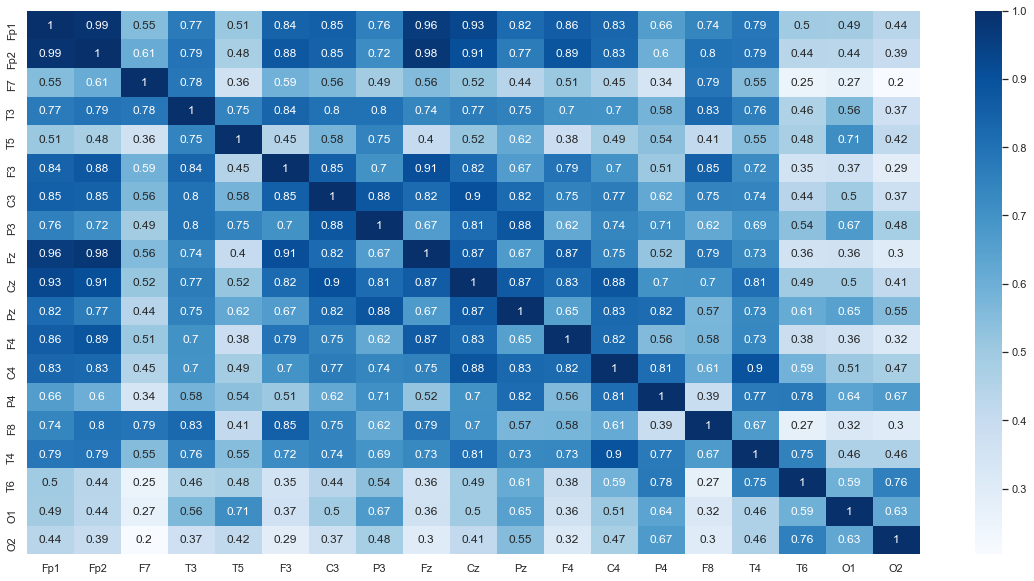

In [17]:
# update figure size
plt.rcParams['figure.figsize'] = [20, 10]

# we don't need to check the correlation between time and other electrode node, so drop it first
# df.drop(columns = ["time"], inplace=True)

sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);

##### Interpretation

We can see that nodes that are close to each other tend to be more correlated, as seen by the darker blue sections along the diagonal of the heatmap below and lighter blue near the outsides. This makes sense intuitively, because when a change in voltage occurs it may be picked up by multiple channels.

## Methods 

We have decided to try different approaches for this task, links to each section are provided below:

- KMeans
- Hidden Markov Model